In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tqdm
from sklearn import metrics, model_selection
# The libraries below are built-into python and are used to work with local storage and directories
import os
import glob

In [25]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
y_train.shape

(60000,)

In [28]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [29]:
# reshape the y for train and testing from (n,f) to (n)
y_train=y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [30]:
y_train.shape

(60000,)

In [31]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

# Create Data Pipeline

In [32]:
# read the image
def get_image_tensor_from_path(image, label):
    # scale the pixle values between 0-1
    image=tf.image.convert_image_dtype(image,tf.float32)
    

    label=tf.one_hot(label,depth=10) # create the onehot vecotr for the labels 

    return image, label

In [33]:
# test the read the image 
x,y=get_image_tensor_from_path(x_train[1],y_train[1])

tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


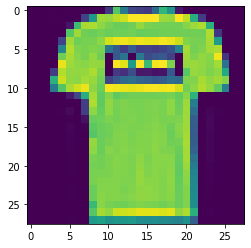

In [34]:
plt.imshow(x)
print(y)

In [35]:
# This is the same function that was defined in the CIFAR10 example
def augment_image(image, label):

    image = tf.image.random_flip_left_right(image)  # Randomly flip an image horizontally
    image = tf.image.random_flip_up_down(image)  # Randomly flips an image vertically
    image = tf.image.random_brightness(image, max_delta=32.0 / 255.0)  # Adjust the brightness of images by a random factor
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)  # Adjust the saturation of RGB images by a random factor
    image = tf.clip_by_value(image,0.0,1.0)
    

    

    return image, label


In [36]:
# create the data pipeline
def create_data_pipeline(x, y, batch_size=32, training=False):
    data = tf.data.Dataset.from_tensor_slices((x, y))
    data = data.shuffle(50000)  # Shuffle the data, `2000` represnts the buffer size, read the documentation for more details


    # Convert image paths to image tensors using get_image_tensor_from_path
    data = data.map(get_image_tensor_from_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    if (training):  # If training == True then apply train preprocess on dataset, this makes sure that the validation dataset isn't augmented
        data = data.map(augment_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)  # Applying the augment_image function on dataset
    data = data.batch(batch_size)  # Create mini-batches for the specified size
    # This allows later elements to be prepared while the current element is being processed.
    data = data.prefetch(tf.data.experimental.AUTOTUNE)

    return data

In [37]:
# create the train pipleine 
train_dataset = create_data_pipeline(x_train,y_train, training=False)
# create the test pipeline
test_dataset = create_data_pipeline(x_test,y_test)

In [38]:
for x,y in train_dataset.take(2):
    print(y)
    print(x.shape)
    print(np.argmax(y,axis=-1))

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

In [39]:
# create the model class inheritance from the Model class 
tf.keras.backend.clear_session()
tf.random.set_seed(42)
class CNN_MODEL(tf.keras.Model):
    def __init__(self,class_number):
        super(CNN_MODEL,self).__init__()
        
        
      
        self.out=tf.keras.layers.Dense(class_number)
    def call(self,x):
        
        x=tf.keras.layers.Flatten()(x)
        x=self.out(x)
        x=tf.nn.softmax(x)
        return x 
# initial  the model
model=CNN_MODEL(10)
model.build((None,28,28))# build the model 

In [40]:
model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [41]:
# compile the model 
model.compile(
    optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"]
)

In [42]:
# train the model 
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5941 - accuracy: 0.8014 - val_loss: 0.5079 - val_accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4612 - accuracy: 0.8419 - val_loss: 0.4776 - val_accuracy: 0.8330
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4353 - accuracy: 0.8502 - val_loss: 0.4629 - val_accuracy: 0.8403
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4223 - accuracy: 0.8550 - val_loss: 0.4558 - val_accuracy: 0.8426
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4125 - accuracy: 0.8579 - val_loss: 0.4575 - val_accuracy: 0.8381
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4070 - accuracy: 0.8600 - val_loss: 0.4494 - val_accuracy: 0.8413
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4023 - accuracy: 0.8608 - val_loss: 0.4560 - val_accuracy:

## Model Evaluation 

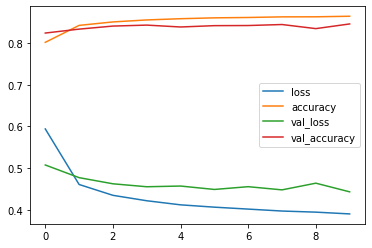

In [43]:
pd.DataFrame(model.history.history).plot()

In [44]:
preds=np.array([])
ys=np.array([])
for x,y in tqdm.tqdm(test_dataset):
    pred = np.argmax( model.predict(x),axis=-1)
    y=np.argmax( y,axis=-1)
    preds=np.append(preds,pred)
    ys=np.append(ys,y)
    
    

100%|██████████| 313/313 [00:20<00:00, 15.28it/s]


accuracy_score: 0.8454
precision_score: 0.8459690938226718
recall_score: 0.8454
f1_score: 0.8447729158079063


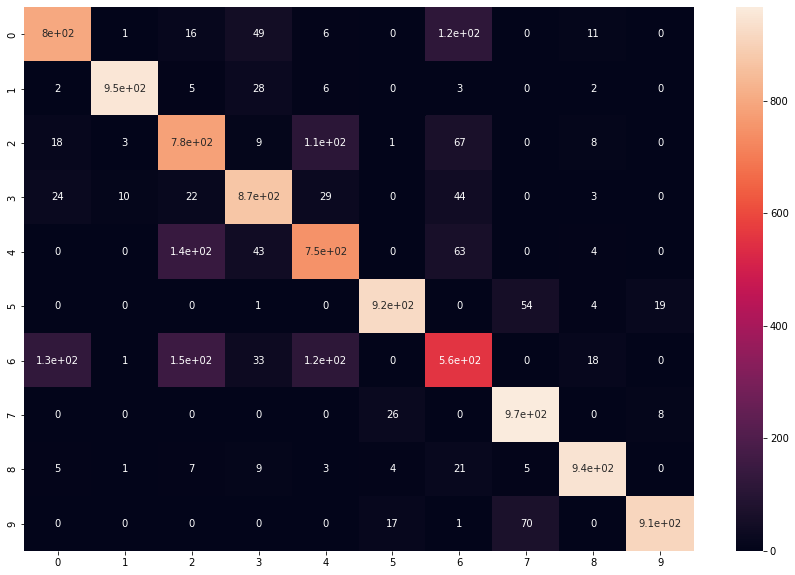

In [45]:
accuracy_score=metrics.accuracy_score(y_true=ys,y_pred=preds)
precision_score=metrics.precision_score(ys,preds,average='weighted')
recall_score=metrics.recall_score(ys,preds,average='weighted')
f1_score=metrics.f1_score(ys,preds,average='weighted')
confion_metrix=metrics.confusion_matrix(ys,preds)
print('accuracy_score:',accuracy_score)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)
plt.figure(figsize=(15,10))
sn.heatmap(confion_metrix,annot=True,)
